In [1]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/data_processing/SPY_indicators.csv')
df2 = df1.iloc[:,2:]
df3 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
df1 = df3
df1.head()

,open,high,low,close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,191.779999,191.910004,187.639999,188.009995,171.096954,178515900,195.2680,200.883601,189.652399,4.172916,-1.178742,-192.854078,194.285195,-4.003069,195.358334,192.254001,2.426203,-3.806601,-4.003069
1,188.270004,189.740005,186.929993,188.119995,171.197083,159045600,194.7905,201.090328,188.490672,4.075566,-1.561348,-182.945293,193.463168,-4.381422,194.640000,191.095999,7.456150,-4.245145,-4.381422
2,190.369995,191.830002,189.440002,191.630005,174.391342,163452000,194.7835,201.097033,188.469967,4.049454,-1.563317,-102.935516,193.218746,-2.234575,194.275000,190.701999,29.448686,-1.175803,-2.234575
3,192.080002,192.490005,189.820007,192.130005,174.846375,131079000,194.6195,201.029088,188.209912,3.950922,-1.507157,-80.082798,193.073581,-3.189561,193.747500,190.548001,32.581517,-0.759298,-3.189561
4,189.770004,195.029999,189.119995,195.000000,177.458160,211003300,194.5920,200.990092,188.193908,4.090856,-1.217037,-36.705309,193.330437,-2.587668,193.315834,190.978000,50.563935,1.088650,-2.587668


In [3]:
list(df1.columns)

['open',
 'high',
 'low',
 'close',
 'Adj Close',
 'Volume',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'atr',
 'macd',
 'cci',
 'ema',
 'roc',
 'sma12',
 'sma5',
 'stochastic_oscillator',
 'mtm6',
 'mtm12']

In [4]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [5]:
df3 = df1[['open', 'high', 'low', 'close']]

In [6]:
a = df3.close.values

In [7]:
b = df3.values

In [8]:
try:
    df1 = df1.drop(['date'], axis=1)
except KeyError:
    pass
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [9]:
#df2=df2.drop(df2.index[-1])
#df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [10]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [11]:
#df1 = df1.drop(['date'], axis=1)
close = df1['close']
#df1 = df1.drop(['close'], axis=1)
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [12]:
g = df1.values
r = g.shape[0]
n_train = 4*r//5
n_val = 1
#n1_train = 9*r//10
#train_indices = random.sample(range(r), n_train)
#test_indices = [i for i in list(range(r)) if i not in train_indices]
#train_indices.sort()
#test_indices.sort()

In [13]:
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [14]:
price_cols = ['open', 'high', 'low', 'close']
price_data = df1[price_cols]
data = df1
g = data.values
pre_X_train=g[:n_train,:]
pre_X_test=g[n_train:,:]
#exp_X_train = g[n_train:n1_train,:]
#exp_X_test = g[n1_train:,:]
#h = price.values
pre_X_train.shape

(987, 19)

In [15]:
price_train = price_data[:n_train]
price_test = price_data[n_train:]

In [16]:
price_train.head()

,open,high,low,close
0,191.779999,191.910004,187.639999,188.009995
1,188.270004,189.740005,186.929993,188.119995
2,190.369995,191.830002,189.440002,191.630005
3,192.080002,192.490005,189.820007,192.130005
4,189.770004,195.029999,189.119995,195.000000


In [17]:
#exp_y_train=h[train_indices]
#exp_y_test=h[test_indices]
print(pre_X_train.shape, pre_X_test.shape)
#print(price_train.shape, price_test.shape)

(987, 19) (247, 19)


In [18]:
price_test.shape

(247, 4)

In [19]:
pre_X_train

array([[ 1.91779999e+02,  1.91910004e+02,  1.87639999e+02, ...,
         2.42620328e+00, -3.80660124e+00, -4.00306906e+00],
       [ 1.88270004e+02,  1.89740005e+02,  1.86929993e+02, ...,
         7.45615008e+00, -4.24514492e+00, -4.38142207e+00],
       [ 1.90369995e+02,  1.91830002e+02,  1.89440002e+02, ...,
         2.94486857e+01, -1.17580267e+00, -2.23457482e+00],
       ...,
       [ 2.87269989e+02,  2.88000000e+02,  2.85579987e+02, ...,
         4.92155110e+01, -2.94272454e-01, -1.91403688e+00],
       [ 2.89540009e+02,  2.89950012e+02,  2.86029999e+02, ...,
         3.80951361e+01, -1.86774954e+00, -1.62883207e+00],
       [ 2.86140015e+02,  2.89070007e+02,  2.85250000e+02, ...,
         5.52722075e+01, -4.13658181e-01,  2.84655806e-01]])

In [20]:
coeffs= pywt.wavedec2(price_train, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')

In [21]:
print(d.shape)
print(pre_X_train.shape)

(988, 4)
(987, 19)


In [22]:
e = d[1:]
e.shape

(987, 4)

In [23]:
pre_X_train[:,0] = e[:,0]
pre_X_train[:,1] = e[:,1]
pre_X_train[:,2] = e[:,2]
pre_X_train[:,3] = e[:,3]

In [24]:
from sklearn import preprocessing

In [25]:
#exp_X_train[:,1]

In [26]:
scaler= preprocessing.MinMaxScaler()
scaler.fit(pre_X_train)
exp_X_train=scaler.transform(pre_X_train)
exp_X_test=scaler.transform(pre_X_test)

In [27]:
#exp_X_train_drop = np.delete(exp_X_train, 3, axis=1)
#exp_X_test_drop = np.delete(exp_X_test, 3, axis=1)

In [28]:
price_train = d[:,1]
len(price_train)

988

In [29]:
pd.DataFrame(exp_X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.050651,0.050651,0.034531,0.034531,0.028721,0.460492,0.062039,0.060587,0.079172,0.561189,0.528097,0.299367,0.056815,0.386677,0.062052,0.061481,0.024262,0.376137,0.386677
1,0.061509,0.061509,0.060857,0.060857,0.029499,0.400981,0.057732,0.062415,0.069126,0.544195,0.497461,0.314040,0.049449,0.370693,0.055602,0.051498,0.074562,0.349640,0.370693
2,0.061509,0.061509,0.060857,0.060857,0.054318,0.414449,0.057669,0.062474,0.068947,0.539636,0.497303,0.432519,0.047259,0.461390,0.052325,0.048102,0.294487,0.535093,0.461390
3,0.089844,0.089844,0.094833,0.094833,0.057854,0.315501,0.056190,0.061873,0.066699,0.522436,0.501800,0.466360,0.045958,0.421045,0.047588,0.046774,0.325815,0.560259,0.421045
4,0.089844,0.089844,0.094833,0.094833,0.078148,0.559790,0.055942,0.061529,0.066560,0.546864,0.525031,0.530594,0.048260,0.446473,0.043712,0.050481,0.505639,0.671914,0.446473


In [30]:
pd.DataFrame(exp_X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.918423,0.930759,0.914355,0.931194,0.928162,0.091826,0.909255,0.896942,0.885315,0.582670,0.518740,0.702195,0.913306,0.556226,0.901224,0.888900,0.866496,0.608822,0.556226
1,0.939840,0.940011,0.921279,0.930083,0.927172,0.107115,0.909178,0.896707,0.885397,0.564266,0.544035,0.723731,0.916395,0.683024,0.907622,0.902003,0.848947,0.607997,0.683024
2,0.908571,0.917223,0.902902,0.915466,0.914145,0.126066,0.912299,0.895568,0.892495,0.551665,0.553824,0.632882,0.917028,0.646178,0.912178,0.906727,0.704641,0.731072,0.646178
3,0.930588,0.938469,0.928886,0.943673,0.939284,0.058168,0.915113,0.900609,0.892959,0.541711,0.583355,0.734843,0.921521,0.631701,0.916062,0.919089,0.983124,0.732853,0.631701
4,0.961856,0.979332,0.943331,0.975982,0.968081,0.169336,0.919555,0.912470,0.889872,0.551295,0.631082,0.840078,0.929930,0.635133,0.920170,0.934485,0.934246,0.836767,0.635133


In [31]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

Using TensorFlow backend.


In [32]:
#autoencoder
input_dim = exp_X_train.shape[1]
hidden_dim = 8
activ = 'relu'

# Layer 1 - Input Layer, SAE_1
input_data = Input(shape=(input_dim,))
encoded = Dense(hidden_dim, activation=activ)(input_data)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 2 - SAE_2
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 3 - SAE_3
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 4 - SAE_4
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation=activ)(encoded)
# Layer 5 - SAE_5
encoded = Dense(hidden_dim, activation=activ)(decoded)
decoded = Dense(input_dim, activation='relu')(encoded)

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

decoder_layer = autoencoder.layers[-1]
encoded_input = Input(shape=(hidden_dim,))
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 19)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                171       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_4 (Dense)              (None, 19)                171       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_6 (Dense)              (None, 19)                171 

In [33]:
autoencoder.fit(exp_X_train, exp_X_train, epochs=5,verbose=2)

Epoch 1/5
 - 1s - loss: 0.3192
Epoch 2/5
 - 0s - loss: 0.2284
Epoch 3/5
 - 0s - loss: 0.1885
Epoch 4/5
 - 0s - loss: 0.1765
Epoch 5/5
 - 0s - loss: 0.1688


In [34]:
autoencoded_X_train = encoder.predict(exp_X_train)

In [35]:
autoencoded_X_test = encoder.predict(exp_X_test)

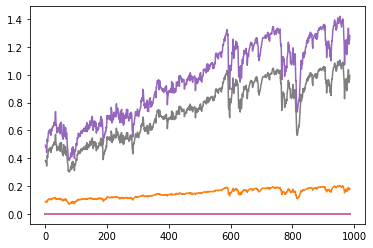

In [36]:
plt.plot(autoencoded_X_train)

In [37]:
autoencoded_X_train.shape, autoencoded_X_test.shape

((987, 8), (247, 8))

In [38]:
pd.DataFrame(autoencoded_X_train).head()

,0,1,2,3,4,5,6,7
0,0.0,0.088919,0.0,0.0,0.492633,0.0,0.0,0.383337
1,0.0,0.087473,0.0,0.0,0.478772,0.0,0.0,0.372860
2,0.0,0.088172,0.0,0.0,0.477818,0.0,0.0,0.373193
3,0.0,0.088276,0.0,0.0,0.478200,0.0,0.0,0.373522
4,0.0,0.081879,0.0,0.0,0.439776,0.0,0.0,0.344007


In [39]:
pd.DataFrame(autoencoded_X_test).head()

,0,1,2,3,4,5,6,7
0,0.0,0.185560,0.0,0.0,1.294851,0.0,0.0,1.006020
1,0.0,0.192970,0.0,0.0,1.353970,0.0,0.0,1.052119
2,0.0,0.190001,0.0,0.0,1.339174,0.0,0.0,1.039965
3,0.0,0.192825,0.0,0.0,1.343929,0.0,0.0,1.044881
4,0.0,0.193019,0.0,0.0,1.339343,0.0,0.0,1.041609


In [40]:
decoded = decoder.predict(autoencoded_X_train)
pd.DataFrame(decoded).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.308788,0.0,0.328118,0.319734,0.300763,0.126840,0.0,0.0,0.0,0.0,0.0,0.341898,0.317907,0.316179,0.0,0.304511,0.0,0.349906,0.284897
1,0.302701,0.0,0.319158,0.311355,0.293572,0.125379,0.0,0.0,0.0,0.0,0.0,0.335167,0.310633,0.308680,0.0,0.296743,0.0,0.342045,0.280796
2,0.302184,0.0,0.319174,0.311322,0.292789,0.125600,0.0,0.0,0.0,0.0,0.0,0.335094,0.310668,0.308306,0.0,0.296417,0.0,0.341889,0.281178
3,0.302351,0.0,0.319459,0.311586,0.292964,0.125667,0.0,0.0,0.0,0.0,0.0,0.335298,0.310906,0.308509,0.0,0.296626,0.0,0.342137,0.281330
4,0.285280,0.0,0.293502,0.287350,0.273845,0.120601,0.0,0.0,0.0,0.0,0.0,0.316256,0.289477,0.288179,0.0,0.275778,0.0,0.319185,0.268881


In [41]:
price_val = price_test.iloc[:n_val,:]
price_test = price_test.iloc[n_val:,:]

In [42]:
autoencoded_X_val = autoencoded_X_test[:n_val,:]
autoencoded_X_test = autoencoded_X_test[n_val:,:]
autoencoded_X_val.shape

(1, 8)

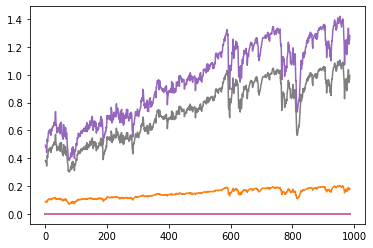

In [43]:
plt.plot(autoencoded_X_train)

In [44]:
autoencoded_X_test.shape

(246, 8)

In [45]:
import random

In [46]:
'''price_train = autoencoded_X_train[:,1]
exp_X_train = np.delete(exp_X_train, 1, axis=1)
exp_X_train.shape'''

'price_train = autoencoded_X_train[:,1]\nexp_X_train = np.delete(exp_X_train, 1, axis=1)\nexp_X_train.shape'

In [47]:
X_train= autoencoded_X_train.reshape((autoencoded_X_train.shape[0],1,autoencoded_X_train.shape[1]))
#X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=price_train[1:]
#y_test=exp_y_test
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(987, 1, 8) (987,)


In [48]:
X_val= autoencoded_X_val.reshape((autoencoded_X_val.shape[0],1,autoencoded_X_val.shape[1]))
#X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_val = price_val.iloc[:,3]

In [49]:
y_val.shape

(1,)

In [50]:
y_test = price_test.iloc[:,3]
y_test.shape
#y_val = price_val.iloc[:,3]

(246,)

In [78]:
from sklearn.preprocessing import MinMaxScaler
ys = MinMaxScaler()
y_train_scaled = scaler.transform(np.array(y_train).reshape(-1,1))
y_test_scaled = scaler.transform(np.array(y_test).reshape(-1,1))

In [51]:
autoencoded_X_test.shape

(246, 8)

In [52]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [53]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=100, verbose=1)
opt = Adam(learning_rate=0.0001)

In [54]:
neurons=60
dropout=0.3
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dense(units=1))
model1.add(Activation('relu'))
model1.compile(loss='mse', optimizer=opt)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 60)             16560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)               

Epoch 1/5000
987/987 [==============================] - 0s 320us/step - loss: 50210.3087
Epoch 2/5000
987/987 [==============================] - 0s 320us/step - loss: 31239.1540
Epoch 3/5000
987/987 [==============================] - 0s 294us/step - loss: 22435.3792
Epoch 4/5000
987/987 [==============================] - 0s 280us/step - loss: 17379.4080
Epoch 5/5000
987/987 [==============================] - 0s 324us/step - loss: 13660.0404
Epoch 6/5000
987/987 [==============================] - 0s 317us/step - loss: 11045.2850
Epoch 7/5000
987/987 [==============================] - 0s 344us/step - loss: 9039.0345
Epoch 8/5000
987/987 [==============================] - 0s 340us/step - loss: 7538.6467
Epoch 9/5000
987/987 [==============================] - 0s 307us/step - loss: 6441.7848
Epoch 10/5000
987/987 [==============================] - 0s 297us/step - loss: 5671.9058
Epoch 11/5000
987/987 [==============================] - 0s 345us/step - loss: 5039.0151
Epoch 12/5000
987/987 [=

Epoch 94/5000
987/987 [==============================] - 0s 337us/step - loss: 16.1604
Epoch 95/5000
987/987 [==============================] - 0s 344us/step - loss: 13.9960
Epoch 96/5000
987/987 [==============================] - 0s 242us/step - loss: 13.6767
Epoch 97/5000
987/987 [==============================] - 0s 431us/step - loss: 13.3825
Epoch 98/5000
987/987 [==============================] - 0s 332us/step - loss: 11.6518
Epoch 99/5000
987/987 [==============================] - 0s 261us/step - loss: 11.0486
Epoch 100/5000
987/987 [==============================] - 0s 390us/step - loss: 11.5128
Epoch 101/5000
987/987 [==============================] - 0s 297us/step - loss: 11.3187
Epoch 102/5000
987/987 [==============================] - 0s 274us/step - loss: 10.4191
Epoch 103/5000
987/987 [==============================] - 0s 271us/step - loss: 11.0941
Epoch 104/5000
987/987 [==============================] - 0s 418us/step - loss: 11.1266
Epoch 105/5000
987/987 [==============

987/987 [==============================] - 0s 442us/step - loss: 6.1422
Epoch 188/5000
987/987 [==============================] - 0s 359us/step - loss: 6.3978
Epoch 189/5000
987/987 [==============================] - 0s 364us/step - loss: 6.4671
Epoch 190/5000
987/987 [==============================] - 0s 431us/step - loss: 5.9070
Epoch 191/5000
987/987 [==============================] - 0s 459us/step - loss: 6.8210
Epoch 192/5000
987/987 [==============================] - 0s 495us/step - loss: 5.9150
Epoch 193/5000
987/987 [==============================] - 1s 530us/step - loss: 6.3090
Epoch 194/5000
987/987 [==============================] - 0s 455us/step - loss: 6.8232
Epoch 195/5000
987/987 [==============================] - 0s 477us/step - loss: 6.1385
Epoch 196/5000
987/987 [==============================] - 0s 469us/step - loss: 5.3690
Epoch 197/5000
987/987 [==============================] - 1s 511us/step - loss: 6.4122
Epoch 198/5000
987/987 [==============================] - 

987/987 [==============================] - 1s 1ms/step - loss: 4.3550
Epoch 282/5000
987/987 [==============================] - 1s 793us/step - loss: 4.4586
Epoch 283/5000
987/987 [==============================] - 1s 938us/step - loss: 4.4577
Epoch 284/5000
987/987 [==============================] - 1s 1ms/step - loss: 4.7760
Epoch 285/5000
987/987 [==============================] - 1s 849us/step - loss: 4.4293
Epoch 286/5000
987/987 [==============================] - 1s 554us/step - loss: 4.4230
Epoch 287/5000
987/987 [==============================] - 0s 499us/step - loss: 4.4776
Epoch 288/5000
987/987 [==============================] - 0s 457us/step - loss: 4.3239
Epoch 289/5000
987/987 [==============================] - 0s 452us/step - loss: 4.1893
Epoch 290/5000
987/987 [==============================] - 0s 442us/step - loss: 4.8556
Epoch 291/5000
987/987 [==============================] - 0s 466us/step - loss: 4.7506
Epoch 292/5000
987/987 [==============================] - 1s 5

987/987 [==============================] - 0s 393us/step - loss: 3.4620
Epoch 376/5000
987/987 [==============================] - 0s 448us/step - loss: 3.8710 0s - loss: 4.
Epoch 377/5000
987/987 [==============================] - 0s 374us/step - loss: 3.8068
Epoch 378/5000
987/987 [==============================] - 0s 393us/step - loss: 3.4804
Epoch 379/5000
987/987 [==============================] - 0s 409us/step - loss: 3.5476
Epoch 380/5000
987/987 [==============================] - 0s 437us/step - loss: 3.4458
Epoch 381/5000
987/987 [==============================] - 0s 488us/step - loss: 3.7586
Epoch 382/5000
987/987 [==============================] - 0s 460us/step - loss: 3.8835
Epoch 383/5000
987/987 [==============================] - 1s 535us/step - loss: 3.7433
Epoch 384/5000
987/987 [==============================] - 0s 453us/step - loss: 3.7615
Epoch 385/5000
987/987 [==============================] - 0s 348us/step - loss: 3.4387
Epoch 386/5000
987/987 [====================

987/987 [==============================] - 0s 402us/step - loss: 2.9722
Epoch 470/5000
987/987 [==============================] - 0s 328us/step - loss: 2.8242
Epoch 471/5000
987/987 [==============================] - 0s 350us/step - loss: 3.0286
Epoch 472/5000
987/987 [==============================] - 0s 414us/step - loss: 2.6766
Epoch 473/5000
987/987 [==============================] - 0s 366us/step - loss: 2.9904
Epoch 474/5000
987/987 [==============================] - 0s 330us/step - loss: 2.7674 0s - loss: 3.5
Epoch 475/5000
987/987 [==============================] - 0s 347us/step - loss: 2.7658
Epoch 476/5000
987/987 [==============================] - 0s 368us/step - loss: 2.7884
Epoch 477/5000
987/987 [==============================] - 0s 389us/step - loss: 2.4930
Epoch 478/5000
987/987 [==============================] - 0s 365us/step - loss: 2.7286
Epoch 479/5000
987/987 [==============================] - 0s 400us/step - loss: 2.9156
Epoch 480/5000
987/987 [===================

987/987 [==============================] - 0s 343us/step - loss: 1.7915
Epoch 564/5000
987/987 [==============================] - 0s 367us/step - loss: 1.8236
Epoch 565/5000
987/987 [==============================] - 0s 332us/step - loss: 1.7805
Epoch 566/5000
987/987 [==============================] - 0s 327us/step - loss: 1.7841
Epoch 567/5000
987/987 [==============================] - 0s 389us/step - loss: 1.8301
Epoch 568/5000
987/987 [==============================] - 0s 397us/step - loss: 1.7271
Epoch 569/5000
987/987 [==============================] - 0s 350us/step - loss: 1.7924
Epoch 570/5000
987/987 [==============================] - 0s 360us/step - loss: 1.6321
Epoch 571/5000
987/987 [==============================] - 0s 332us/step - loss: 1.7161
Epoch 572/5000
987/987 [==============================] - 0s 325us/step - loss: 1.6912
Epoch 573/5000
987/987 [==============================] - 0s 341us/step - loss: 1.5907
Epoch 574/5000
987/987 [==============================] - 

987/987 [==============================] - 0s 413us/step - loss: 1.0215
Epoch 658/5000
987/987 [==============================] - 0s 325us/step - loss: 1.0120
Epoch 659/5000
987/987 [==============================] - 0s 358us/step - loss: 1.0476
Epoch 660/5000
987/987 [==============================] - 0s 375us/step - loss: 1.0086
Epoch 661/5000
987/987 [==============================] - 0s 333us/step - loss: 1.0188
Epoch 662/5000
987/987 [==============================] - 0s 334us/step - loss: 0.9880
Epoch 663/5000
987/987 [==============================] - 0s 344us/step - loss: 1.0058
Epoch 664/5000
987/987 [==============================] - 0s 342us/step - loss: 0.9873
Epoch 665/5000
987/987 [==============================] - 0s 327us/step - loss: 0.9761
Epoch 666/5000
987/987 [==============================] - 0s 357us/step - loss: 0.9459
Epoch 667/5000
987/987 [==============================] - 0s 368us/step - loss: 0.9578
Epoch 668/5000
987/987 [==============================] - 

987/987 [==============================] - 0s 329us/step - loss: 0.5904
Epoch 752/5000
987/987 [==============================] - 0s 338us/step - loss: 0.6084
Epoch 753/5000
987/987 [==============================] - 0s 346us/step - loss: 0.5532
Epoch 754/5000
987/987 [==============================] - 0s 321us/step - loss: 0.5653
Epoch 755/5000
987/987 [==============================] - 0s 384us/step - loss: 0.5665
Epoch 756/5000
987/987 [==============================] - 0s 341us/step - loss: 0.5711
Epoch 757/5000
987/987 [==============================] - 0s 344us/step - loss: 0.5774
Epoch 758/5000
987/987 [==============================] - 0s 351us/step - loss: 0.5657
Epoch 759/5000
987/987 [==============================] - 0s 339us/step - loss: 0.5360
Epoch 760/5000
987/987 [==============================] - 0s 414us/step - loss: 0.5429
Epoch 761/5000
987/987 [==============================] - 0s 332us/step - loss: 0.5173
Epoch 762/5000
987/987 [==============================] - 

987/987 [==============================] - 0s 322us/step - loss: 0.2905
Epoch 846/5000
987/987 [==============================] - 0s 333us/step - loss: 0.2909
Epoch 847/5000
987/987 [==============================] - 0s 319us/step - loss: 0.2826
Epoch 848/5000
987/987 [==============================] - 0s 319us/step - loss: 0.2831
Epoch 849/5000
987/987 [==============================] - 0s 307us/step - loss: 0.2890
Epoch 850/5000
987/987 [==============================] - 0s 318us/step - loss: 0.2744
Epoch 851/5000
987/987 [==============================] - 0s 436us/step - loss: 0.2866
Epoch 852/5000
987/987 [==============================] - 0s 310us/step - loss: 0.2701
Epoch 853/5000
987/987 [==============================] - 0s 329us/step - loss: 0.2747
Epoch 854/5000
987/987 [==============================] - 0s 314us/step - loss: 0.2703
Epoch 855/5000
987/987 [==============================] - 0s 323us/step - loss: 0.2682
Epoch 856/5000
987/987 [==============================] - 

987/987 [==============================] - 0s 295us/step - loss: 0.1813
Epoch 940/5000
987/987 [==============================] - 0s 305us/step - loss: 0.1803
Epoch 941/5000
987/987 [==============================] - 0s 317us/step - loss: 0.1747
Epoch 942/5000
987/987 [==============================] - 0s 301us/step - loss: 0.1801
Epoch 943/5000
987/987 [==============================] - 0s 308us/step - loss: 0.1723
Epoch 944/5000
987/987 [==============================] - 0s 317us/step - loss: 0.1877
Epoch 945/5000
987/987 [==============================] - 0s 311us/step - loss: 0.1748
Epoch 946/5000
987/987 [==============================] - 0s 306us/step - loss: 0.1701
Epoch 947/5000
987/987 [==============================] - 0s 303us/step - loss: 0.1705
Epoch 948/5000
987/987 [==============================] - 0s 296us/step - loss: 0.1743
Epoch 949/5000
987/987 [==============================] - 0s 344us/step - loss: 0.1717
Epoch 950/5000
987/987 [==============================] - 

Epoch 1033/5000
987/987 [==============================] - 0s 304us/step - loss: 0.1074
Epoch 1034/5000
987/987 [==============================] - 0s 316us/step - loss: 0.1054 0s - loss: 0.0
Epoch 1035/5000
987/987 [==============================] - 0s 332us/step - loss: 0.1067
Epoch 1036/5000
987/987 [==============================] - 0s 305us/step - loss: 0.1063
Epoch 1037/5000
987/987 [==============================] - 0s 305us/step - loss: 0.1030
Epoch 1038/5000
987/987 [==============================] - 0s 320us/step - loss: 0.1010
Epoch 1039/5000
987/987 [==============================] - 0s 312us/step - loss: 0.1080
Epoch 1040/5000
987/987 [==============================] - 0s 292us/step - loss: 0.1032
Epoch 1041/5000
987/987 [==============================] - 0s 289us/step - loss: 0.1093
Epoch 1042/5000
987/987 [==============================] - 0s 304us/step - loss: 0.1023
Epoch 1043/5000
987/987 [==============================] - 0s 300us/step - loss: 0.1017
Epoch 1044/5000
9

Epoch 1126/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0712
Epoch 1127/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0682
Epoch 1128/5000
987/987 [==============================] - 0s 357us/step - loss: 0.0681
Epoch 1129/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0701
Epoch 1130/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0676
Epoch 1131/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0696
Epoch 1132/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0683
Epoch 1133/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0667
Epoch 1134/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0692
Epoch 1135/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0686
Epoch 1136/5000
987/987 [==============================] - 0s 318us/step - loss: 0.0668
Epoch 1137/5000
987/987 [=======

987/987 [==============================] - 0s 308us/step - loss: 0.0491
Epoch 1220/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0482
Epoch 1221/5000
987/987 [==============================] - 0s 324us/step - loss: 0.0500
Epoch 1222/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0502
Epoch 1223/5000
987/987 [==============================] - 0s 311us/step - loss: 0.0497
Epoch 1224/5000
987/987 [==============================] - 0s 327us/step - loss: 0.0506
Epoch 1225/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0507
Epoch 1226/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0491
Epoch 1227/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0482
Epoch 1228/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0482
Epoch 1229/5000
987/987 [==============================] - 0s 294us/step - loss: 0.0480
Epoch 1230/5000
987/987 [=======================

987/987 [==============================] - 0s 351us/step - loss: 0.0387
Epoch 1313/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0388
Epoch 1314/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0411
Epoch 1315/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0392
Epoch 1316/5000
987/987 [==============================] - 0s 328us/step - loss: 0.0387
Epoch 1317/5000
987/987 [==============================] - 0s 311us/step - loss: 0.0394
Epoch 1318/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0377
Epoch 1319/5000
987/987 [==============================] - 0s 297us/step - loss: 0.0397
Epoch 1320/5000
987/987 [==============================] - 0s 333us/step - loss: 0.0385
Epoch 1321/5000
987/987 [==============================] - 0s 416us/step - loss: 0.0391
Epoch 1322/5000
987/987 [==============================] - 0s 414us/step - loss: 0.0377
Epoch 1323/5000
987/987 [=======================

987/987 [==============================] - 0s 305us/step - loss: 0.0312
Epoch 1406/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0311
Epoch 1407/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0310
Epoch 1408/5000
987/987 [==============================] - 0s 384us/step - loss: 0.0303
Epoch 1409/5000
987/987 [==============================] - 0s 330us/step - loss: 0.0307
Epoch 1410/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0305
Epoch 1411/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0306
Epoch 1412/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0305
Epoch 1413/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0308
Epoch 1414/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0306
Epoch 1415/5000
987/987 [==============================] - 0s 304us/step - loss: 0.0298
Epoch 1416/5000
987/987 [=======================

987/987 [==============================] - 0s 361us/step - loss: 0.0237
Epoch 1499/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0223
Epoch 1500/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0230
Epoch 1501/5000
987/987 [==============================] - 0s 337us/step - loss: 0.0223
Epoch 1502/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0237
Epoch 1503/5000
987/987 [==============================] - 0s 356us/step - loss: 0.0233
Epoch 1504/5000
987/987 [==============================] - 0s 340us/step - loss: 0.0223
Epoch 1505/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0227
Epoch 1506/5000
987/987 [==============================] - 0s 273us/step - loss: 0.0221
Epoch 1507/5000
987/987 [==============================] - 0s 284us/step - loss: 0.0222
Epoch 1508/5000
987/987 [==============================] - 0s 270us/step - loss: 0.0225
Epoch 1509/5000
987/987 [=======================

987/987 [==============================] - 0s 239us/step - loss: 0.0179
Epoch 1592/5000
987/987 [==============================] - 0s 241us/step - loss: 0.0177
Epoch 1593/5000
987/987 [==============================] - 0s 244us/step - loss: 0.0175
Epoch 1594/5000
987/987 [==============================] - 0s 239us/step - loss: 0.0172
Epoch 1595/5000
987/987 [==============================] - 0s 237us/step - loss: 0.0174
Epoch 1596/5000
987/987 [==============================] - 0s 244us/step - loss: 0.0171
Epoch 1597/5000
987/987 [==============================] - 0s 237us/step - loss: 0.0166
Epoch 1598/5000
987/987 [==============================] - 0s 246us/step - loss: 0.0181
Epoch 1599/5000
987/987 [==============================] - 0s 246us/step - loss: 0.0178
Epoch 1600/5000
987/987 [==============================] - 0s 239us/step - loss: 0.0171
Epoch 1601/5000
987/987 [==============================] - 0s 247us/step - loss: 0.0176
Epoch 1602/5000
987/987 [=======================

987/987 [==============================] - 0s 249us/step - loss: 0.0146
Epoch 1685/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0151
Epoch 1686/5000
987/987 [==============================] - 0s 259us/step - loss: 0.0156
Epoch 1687/5000
987/987 [==============================] - 0s 244us/step - loss: 0.0154
Epoch 1688/5000
987/987 [==============================] - 0s 275us/step - loss: 0.0149
Epoch 1689/5000
987/987 [==============================] - 0s 255us/step - loss: 0.0149
Epoch 1690/5000
987/987 [==============================] - 0s 259us/step - loss: 0.0148
Epoch 1691/5000
987/987 [==============================] - 0s 250us/step - loss: 0.0147
Epoch 1692/5000
987/987 [==============================] - 0s 257us/step - loss: 0.0151
Epoch 1693/5000
987/987 [==============================] - 0s 237us/step - loss: 0.0148
Epoch 1694/5000
987/987 [==============================] - 0s 238us/step - loss: 0.0144
Epoch 1695/5000
987/987 [=======================

Epoch 1777/5000
987/987 [==============================] - 0s 296us/step - loss: 0.0135
Epoch 1778/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0132
Epoch 1779/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0128
Epoch 1780/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0132
Epoch 1781/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0135
Epoch 1782/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0133
Epoch 1783/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0136
Epoch 1784/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0131
Epoch 1785/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0135
Epoch 1786/5000
987/987 [==============================] - 0s 297us/step - loss: 0.0133
Epoch 1787/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0131
Epoch 1788/5000
987/987 [=======

987/987 [==============================] - 0s 291us/step - loss: 0.0125
Epoch 1871/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0125
Epoch 1872/5000
987/987 [==============================] - 0s 288us/step - loss: 0.0120
Epoch 1873/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0120
Epoch 1874/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0122
Epoch 1875/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0123
Epoch 1876/5000
987/987 [==============================] - 0s 314us/step - loss: 0.0120
Epoch 1877/5000
987/987 [==============================] - 0s 291us/step - loss: 0.0120
Epoch 1878/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0121
Epoch 1879/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0118
Epoch 1880/5000
987/987 [==============================] - 0s 323us/step - loss: 0.0121
Epoch 1881/5000
987/987 [=======================

987/987 [==============================] - 0s 322us/step - loss: 0.0109
Epoch 1964/5000
987/987 [==============================] - 0s 323us/step - loss: 0.0113
Epoch 1965/5000
987/987 [==============================] - 0s 348us/step - loss: 0.0117
Epoch 1966/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0120
Epoch 1967/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0114
Epoch 1968/5000
987/987 [==============================] - 0s 322us/step - loss: 0.0118
Epoch 1969/5000
987/987 [==============================] - 0s 311us/step - loss: 0.0110
Epoch 1970/5000
987/987 [==============================] - 0s 321us/step - loss: 0.0113
Epoch 1971/5000
987/987 [==============================] - 0s 318us/step - loss: 0.0112
Epoch 1972/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0112
Epoch 1973/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0109
Epoch 1974/5000
987/987 [=======================

987/987 [==============================] - 0s 329us/step - loss: 0.0106
Epoch 2057/5000
987/987 [==============================] - 0s 340us/step - loss: 0.0107
Epoch 2058/5000
987/987 [==============================] - 0s 342us/step - loss: 0.0104
Epoch 2059/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0108
Epoch 2060/5000
987/987 [==============================] - 0s 340us/step - loss: 0.0106
Epoch 2061/5000
987/987 [==============================] - 0s 371us/step - loss: 0.0106
Epoch 2062/5000
987/987 [==============================] - 0s 350us/step - loss: 0.0106
Epoch 2063/5000
987/987 [==============================] - 0s 327us/step - loss: 0.0107 0s - loss: 0.01
Epoch 2064/5000
987/987 [==============================] - 0s 469us/step - loss: 0.0109
Epoch 2065/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0113
Epoch 2066/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0104
Epoch 2067/5000
987/987 [=======

Epoch 2149/5000
987/987 [==============================] - 0s 330us/step - loss: 0.0100
Epoch 2150/5000
987/987 [==============================] - 0s 321us/step - loss: 0.0099
Epoch 2151/5000
987/987 [==============================] - 0s 339us/step - loss: 0.0101
Epoch 2152/5000
987/987 [==============================] - 0s 318us/step - loss: 0.0101
Epoch 2153/5000
987/987 [==============================] - 0s 345us/step - loss: 0.0102
Epoch 2154/5000
987/987 [==============================] - 0s 317us/step - loss: 0.0103
Epoch 2155/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0101
Epoch 2156/5000
987/987 [==============================] - 0s 335us/step - loss: 0.0099
Epoch 2157/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0101
Epoch 2158/5000
987/987 [==============================] - 0s 332us/step - loss: 0.0102
Epoch 2159/5000
987/987 [==============================] - 0s 328us/step - loss: 0.0103
Epoch 2160/5000
987/987 [=======

987/987 [==============================] - 0s 305us/step - loss: 0.0095
Epoch 2243/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0097
Epoch 2244/5000
987/987 [==============================] - 0s 296us/step - loss: 0.0096
Epoch 2245/5000
987/987 [==============================] - 0s 304us/step - loss: 0.0094
Epoch 2246/5000
987/987 [==============================] - 0s 287us/step - loss: 0.0102
Epoch 2247/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0095
Epoch 2248/5000
987/987 [==============================] - 0s 289us/step - loss: 0.0097
Epoch 2249/5000
987/987 [==============================] - 0s 286us/step - loss: 0.0094
Epoch 2250/5000
987/987 [==============================] - 0s 292us/step - loss: 0.0097
Epoch 2251/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0096
Epoch 2252/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0097
Epoch 2253/5000
987/987 [=======================

987/987 [==============================] - 0s 269us/step - loss: 0.0094
Epoch 2336/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0094
Epoch 2337/5000
987/987 [==============================] - 0s 281us/step - loss: 0.0093
Epoch 2338/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0091
Epoch 2339/5000
987/987 [==============================] - 0s 307us/step - loss: 0.0093
Epoch 2340/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0097
Epoch 2341/5000
987/987 [==============================] - 0s 279us/step - loss: 0.0093
Epoch 2342/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0092
Epoch 2343/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0096
Epoch 2344/5000
987/987 [==============================] - 0s 281us/step - loss: 0.0096
Epoch 2345/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0091
Epoch 2346/5000
987/987 [=======================

987/987 [==============================] - 0s 296us/step - loss: 0.0092
Epoch 2429/5000
987/987 [==============================] - 0s 292us/step - loss: 0.0092
Epoch 2430/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0090
Epoch 2431/5000
987/987 [==============================] - 0s 297us/step - loss: 0.0089
Epoch 2432/5000
987/987 [==============================] - 0s 285us/step - loss: 0.0091
Epoch 2433/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0087
Epoch 2434/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0088
Epoch 2435/5000
987/987 [==============================] - 0s 281us/step - loss: 0.0093
Epoch 2436/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0091
Epoch 2437/5000
987/987 [==============================] - 0s 314us/step - loss: 0.0089
Epoch 2438/5000
987/987 [==============================] - 0s 283us/step - loss: 0.0090
Epoch 2439/5000
987/987 [=======================

987/987 [==============================] - 0s 316us/step - loss: 0.0088
Epoch 2522/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0088
Epoch 2523/5000
987/987 [==============================] - 0s 337us/step - loss: 0.0088
Epoch 2524/5000
987/987 [==============================] - 0s 400us/step - loss: 0.0089
Epoch 2525/5000
987/987 [==============================] - 0s 380us/step - loss: 0.0088
Epoch 2526/5000
987/987 [==============================] - 0s 346us/step - loss: 0.0086
Epoch 2527/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0089
Epoch 2528/5000
987/987 [==============================] - 0s 319us/step - loss: 0.0088
Epoch 2529/5000
987/987 [==============================] - 0s 328us/step - loss: 0.0085
Epoch 2530/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0087
Epoch 2531/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0087
Epoch 2532/5000
987/987 [=======================

987/987 [==============================] - 0s 324us/step - loss: 0.0083
Epoch 2615/5000
987/987 [==============================] - 0s 341us/step - loss: 0.0086
Epoch 2616/5000
987/987 [==============================] - 0s 469us/step - loss: 0.0088
Epoch 2617/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0084
Epoch 2618/5000
987/987 [==============================] - 0s 291us/step - loss: 0.0085
Epoch 2619/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0085
Epoch 2620/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0086
Epoch 2621/5000
987/987 [==============================] - 0s 381us/step - loss: 0.0084
Epoch 2622/5000
987/987 [==============================] - 0s 386us/step - loss: 0.0087
Epoch 2623/5000
987/987 [==============================] - 0s 476us/step - loss: 0.0084
Epoch 2624/5000
987/987 [==============================] - 0s 355us/step - loss: 0.0084
Epoch 2625/5000
987/987 [=======================

987/987 [==============================] - 0s 309us/step - loss: 0.0080
Epoch 2708/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0081
Epoch 2709/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0082
Epoch 2710/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0082
Epoch 2711/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0084
Epoch 2712/5000
987/987 [==============================] - 0s 330us/step - loss: 0.0083
Epoch 2713/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0084
Epoch 2714/5000
987/987 [==============================] - 0s 289us/step - loss: 0.0085
Epoch 2715/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0084
Epoch 2716/5000
987/987 [==============================] - 0s 294us/step - loss: 0.0083
Epoch 2717/5000
987/987 [==============================] - 0s 322us/step - loss: 0.0083
Epoch 2718/5000
987/987 [=======================

987/987 [==============================] - 0s 294us/step - loss: 0.0081
Epoch 2801/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0080
Epoch 2802/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0083
Epoch 2803/5000
987/987 [==============================] - 0s 292us/step - loss: 0.0083
Epoch 2804/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0080
Epoch 2805/5000
987/987 [==============================] - 0s 294us/step - loss: 0.0082
Epoch 2806/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0078
Epoch 2807/5000
987/987 [==============================] - 0s 367us/step - loss: 0.0081
Epoch 2808/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0078
Epoch 2809/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0077
Epoch 2810/5000
987/987 [==============================] - 0s 328us/step - loss: 0.0084
Epoch 2811/5000
987/987 [=======================

987/987 [==============================] - 0s 306us/step - loss: 0.0077
Epoch 2894/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0080
Epoch 2895/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0080
Epoch 2896/5000
987/987 [==============================] - 0s 304us/step - loss: 0.0080
Epoch 2897/5000
987/987 [==============================] - 0s 292us/step - loss: 0.0080
Epoch 2898/5000
987/987 [==============================] - 0s 322us/step - loss: 0.0082
Epoch 2899/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0080
Epoch 2900/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0080
Epoch 2901/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0079
Epoch 2902/5000
987/987 [==============================] - 0s 318us/step - loss: 0.0080
Epoch 2903/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0079
Epoch 2904/5000
987/987 [=======================

987/987 [==============================] - 0s 305us/step - loss: 0.0074
Epoch 2987/5000
987/987 [==============================] - 0s 353us/step - loss: 0.0078
Epoch 2988/5000
987/987 [==============================] - 0s 292us/step - loss: 0.0076
Epoch 2989/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0076
Epoch 2990/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0077
Epoch 2991/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0078
Epoch 2992/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0074
Epoch 2993/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0073
Epoch 2994/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0078
Epoch 2995/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0077
Epoch 2996/5000
987/987 [==============================] - 0s 291us/step - loss: 0.0076
Epoch 2997/5000
987/987 [=======================

987/987 [==============================] - 0s 289us/step - loss: 0.0075
Epoch 3080/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0079
Epoch 3081/5000
987/987 [==============================] - 0s 317us/step - loss: 0.0074
Epoch 3082/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0074
Epoch 3083/5000
987/987 [==============================] - 0s 354us/step - loss: 0.0077
Epoch 3084/5000
987/987 [==============================] - 0s 304us/step - loss: 0.0076
Epoch 3085/5000
987/987 [==============================] - 0s 314us/step - loss: 0.0077
Epoch 3086/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0076
Epoch 3087/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0074
Epoch 3088/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0074
Epoch 3089/5000
987/987 [==============================] - 0s 284us/step - loss: 0.0073
Epoch 3090/5000
987/987 [=======================

987/987 [==============================] - 0s 304us/step - loss: 0.0072
Epoch 3173/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0074
Epoch 3174/5000
987/987 [==============================] - 0s 345us/step - loss: 0.0077
Epoch 3175/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0073
Epoch 3176/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0076
Epoch 3177/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0073
Epoch 3178/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0076
Epoch 3179/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0074
Epoch 3180/5000
987/987 [==============================] - 0s 355us/step - loss: 0.0074
Epoch 3181/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0074
Epoch 3182/5000
987/987 [==============================] - 0s 301us/step - loss: 0.0074
Epoch 3183/5000
987/987 [=======================

987/987 [==============================] - 0s 306us/step - loss: 0.0074
Epoch 3266/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0075
Epoch 3267/5000
987/987 [==============================] - 0s 296us/step - loss: 0.0073
Epoch 3268/5000
987/987 [==============================] - 0s 333us/step - loss: 0.0072
Epoch 3269/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0075
Epoch 3270/5000
987/987 [==============================] - 0s 297us/step - loss: 0.0077
Epoch 3271/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0075
Epoch 3272/5000
987/987 [==============================] - 0s 321us/step - loss: 0.0076
Epoch 3273/5000
987/987 [==============================] - 0s 315us/step - loss: 0.0072
Epoch 3274/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0073
Epoch 3275/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0075
Epoch 3276/5000
987/987 [=======================

987/987 [==============================] - 0s 301us/step - loss: 0.0073
Epoch 3359/5000
987/987 [==============================] - 0s 297us/step - loss: 0.0075
Epoch 3360/5000
987/987 [==============================] - 0s 288us/step - loss: 0.0070
Epoch 3361/5000
987/987 [==============================] - 0s 307us/step - loss: 0.0071
Epoch 3362/5000
987/987 [==============================] - 0s 286us/step - loss: 0.0072
Epoch 3363/5000
987/987 [==============================] - 0s 284us/step - loss: 0.0074
Epoch 3364/5000
987/987 [==============================] - 0s 323us/step - loss: 0.0072
Epoch 3365/5000
987/987 [==============================] - 0s 291us/step - loss: 0.0070
Epoch 3366/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0071
Epoch 3367/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0073
Epoch 3368/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0073
Epoch 3369/5000
987/987 [=======================

987/987 [==============================] - 0s 301us/step - loss: 0.0072
Epoch 3452/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0075
Epoch 3453/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0071
Epoch 3454/5000
987/987 [==============================] - 0s 326us/step - loss: 0.0072
Epoch 3455/5000
987/987 [==============================] - 0s 324us/step - loss: 0.0072
Epoch 3456/5000
987/987 [==============================] - 0s 372us/step - loss: 0.0071
Epoch 3457/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0068
Epoch 3458/5000
987/987 [==============================] - 0s 338us/step - loss: 0.0071
Epoch 3459/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0074
Epoch 3460/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0072
Epoch 3461/5000
987/987 [==============================] - 0s 331us/step - loss: 0.0070
Epoch 3462/5000
987/987 [=======================

987/987 [==============================] - 0s 297us/step - loss: 0.0071
Epoch 3545/5000
987/987 [==============================] - 0s 298us/step - loss: 0.0068
Epoch 3546/5000
987/987 [==============================] - 0s 343us/step - loss: 0.0069
Epoch 3547/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0073
Epoch 3548/5000
987/987 [==============================] - 0s 295us/step - loss: 0.0071
Epoch 3549/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0069
Epoch 3550/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0070
Epoch 3551/5000
987/987 [==============================] - 0s 304us/step - loss: 0.0068
Epoch 3552/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0071
Epoch 3553/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0068
Epoch 3554/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0072
Epoch 3555/5000
987/987 [=======================

987/987 [==============================] - 0s 340us/step - loss: 0.0067
Epoch 3638/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0068
Epoch 3639/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0067
Epoch 3640/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0066
Epoch 3641/5000
987/987 [==============================] - 0s 326us/step - loss: 0.0071
Epoch 3642/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0069
Epoch 3643/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0067
Epoch 3644/5000
987/987 [==============================] - 0s 347us/step - loss: 0.0070
Epoch 3645/5000
987/987 [==============================] - 0s 300us/step - loss: 0.0072
Epoch 3646/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0070
Epoch 3647/5000
987/987 [==============================] - 0s 326us/step - loss: 0.0068
Epoch 3648/5000
987/987 [=======================

987/987 [==============================] - 0s 303us/step - loss: 0.0067
Epoch 3731/5000
987/987 [==============================] - 0s 311us/step - loss: 0.0067
Epoch 3732/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0068
Epoch 3733/5000
987/987 [==============================] - 0s 305us/step - loss: 0.0068
Epoch 3734/5000
987/987 [==============================] - 0s 332us/step - loss: 0.0068
Epoch 3735/5000
987/987 [==============================] - 0s 372us/step - loss: 0.0069
Epoch 3736/5000
987/987 [==============================] - 0s 325us/step - loss: 0.0072
Epoch 3737/5000
987/987 [==============================] - 0s 313us/step - loss: 0.0067
Epoch 3738/5000
987/987 [==============================] - 0s 332us/step - loss: 0.0067
Epoch 3739/5000
987/987 [==============================] - 0s 318us/step - loss: 0.0067
Epoch 3740/5000
987/987 [==============================] - 0s 288us/step - loss: 0.0069
Epoch 3741/5000
987/987 [=======================

987/987 [==============================] - 0s 346us/step - loss: 0.0066
Epoch 3824/5000
987/987 [==============================] - 0s 326us/step - loss: 0.0066
Epoch 3825/5000
987/987 [==============================] - 0s 337us/step - loss: 0.0067
Epoch 3826/5000
987/987 [==============================] - 0s 334us/step - loss: 0.0067
Epoch 3827/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0067
Epoch 3828/5000
987/987 [==============================] - 0s 317us/step - loss: 0.0068
Epoch 3829/5000
987/987 [==============================] - 0s 326us/step - loss: 0.0069
Epoch 3830/5000
987/987 [==============================] - 0s 371us/step - loss: 0.0068
Epoch 3831/5000
987/987 [==============================] - 0s 440us/step - loss: 0.0068
Epoch 3832/5000
987/987 [==============================] - 0s 341us/step - loss: 0.0066
Epoch 3833/5000
987/987 [==============================] - 0s 329us/step - loss: 0.0067
Epoch 3834/5000
987/987 [=======================

987/987 [==============================] - 0s 360us/step - loss: 0.0066
Epoch 3917/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0066
Epoch 3918/5000
987/987 [==============================] - 0s 312us/step - loss: 0.0067
Epoch 3919/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0067
Epoch 3920/5000
987/987 [==============================] - 0s 299us/step - loss: 0.0068
Epoch 3921/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0063
Epoch 3922/5000
987/987 [==============================] - 0s 320us/step - loss: 0.0067
Epoch 3923/5000
987/987 [==============================] - 0s 302us/step - loss: 0.0069
Epoch 3924/5000
987/987 [==============================] - 0s 336us/step - loss: 0.0066
Epoch 3925/5000
987/987 [==============================] - 0s 343us/step - loss: 0.0066
Epoch 3926/5000
987/987 [==============================] - 0s 408us/step - loss: 0.0068
Epoch 3927/5000
987/987 [=======================

987/987 [==============================] - 0s 300us/step - loss: 0.0066
Epoch 4010/5000
987/987 [==============================] - 0s 290us/step - loss: 0.0064
Epoch 4011/5000
987/987 [==============================] - 0s 316us/step - loss: 0.0066
Epoch 4012/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0066
Epoch 4013/5000
987/987 [==============================] - 0s 337us/step - loss: 0.0064
Epoch 4014/5000
987/987 [==============================] - 0s 303us/step - loss: 0.0065
Epoch 4015/5000
987/987 [==============================] - 0s 293us/step - loss: 0.0065
Epoch 4016/5000
987/987 [==============================] - 0s 330us/step - loss: 0.0064
Epoch 4017/5000
987/987 [==============================] - 0s 330us/step - loss: 0.0069
Epoch 4018/5000
987/987 [==============================] - 0s 309us/step - loss: 0.0064
Epoch 4019/5000
987/987 [==============================] - 0s 322us/step - loss: 0.0065
Epoch 4020/5000
987/987 [=======================

987/987 [==============================] - 0s 317us/step - loss: 0.0067
Epoch 4103/5000
987/987 [==============================] - 0s 335us/step - loss: 0.0063
Epoch 4104/5000
987/987 [==============================] - 0s 391us/step - loss: 0.0064
Epoch 4105/5000
987/987 [==============================] - 0s 415us/step - loss: 0.0066
Epoch 4106/5000
987/987 [==============================] - 0s 385us/step - loss: 0.0064
Epoch 4107/5000
987/987 [==============================] - 0s 308us/step - loss: 0.0064
Epoch 4108/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0064
Epoch 4109/5000
987/987 [==============================] - 0s 343us/step - loss: 0.0067
Epoch 4110/5000
987/987 [==============================] - 0s 352us/step - loss: 0.0065
Epoch 4111/5000
987/987 [==============================] - 1s 518us/step - loss: 0.0065
Epoch 4112/5000
987/987 [==============================] - 0s 338us/step - loss: 0.0066
Epoch 4113/5000
987/987 [=======================

987/987 [==============================] - 0s 317us/step - loss: 0.0064
Epoch 4196/5000
987/987 [==============================] - 0s 351us/step - loss: 0.0065
Epoch 4197/5000
987/987 [==============================] - 0s 317us/step - loss: 0.0063
Epoch 4198/5000
987/987 [==============================] - 0s 310us/step - loss: 0.0063
Epoch 4199/5000
987/987 [==============================] - 0s 306us/step - loss: 0.0064
Epoch 4200/5000
987/987 [==============================] - 0s 311us/step - loss: 0.0066
Epoch 4201/5000
987/987 [==============================] - 1s 601us/step - loss: 0.0062
Epoch 4202/5000
987/987 [==============================] - 0s 342us/step - loss: 0.0062
Epoch 4203/5000
987/987 [==============================] - 0s 356us/step - loss: 0.0068
Epoch 4204/5000
987/987 [==============================] - 0s 350us/step - loss: 0.0065
Epoch 4205/5000
987/987 [==============================] - 0s 334us/step - loss: 0.0065
Epoch 4206/5000
987/987 [=======================

987/987 [==============================] - 0s 253us/step - loss: 0.0064
Epoch 4289/5000
987/987 [==============================] - 0s 265us/step - loss: 0.0065
Epoch 4290/5000
987/987 [==============================] - 0s 257us/step - loss: 0.0062
Epoch 4291/5000
987/987 [==============================] - 0s 248us/step - loss: 0.0067
Epoch 4292/5000
987/987 [==============================] - 0s 258us/step - loss: 0.0062
Epoch 4293/5000
987/987 [==============================] - 0s 260us/step - loss: 0.0064
Epoch 4294/5000
987/987 [==============================] - 0s 255us/step - loss: 0.0065
Epoch 4295/5000
987/987 [==============================] - 0s 253us/step - loss: 0.0063
Epoch 4296/5000
987/987 [==============================] - 0s 255us/step - loss: 0.0060
Epoch 4297/5000
987/987 [==============================] - 0s 247us/step - loss: 0.0065
Epoch 4298/5000
987/987 [==============================] - 0s 258us/step - loss: 0.0063
Epoch 4299/5000
987/987 [=======================

987/987 [==============================] - 0s 222us/step - loss: 0.0065
Epoch 4382/5000
987/987 [==============================] - 0s 221us/step - loss: 0.0064
Epoch 4383/5000
987/987 [==============================] - 0s 218us/step - loss: 0.0063
Epoch 4384/5000
987/987 [==============================] - 0s 215us/step - loss: 0.0064
Epoch 4385/5000
987/987 [==============================] - 0s 222us/step - loss: 0.0062
Epoch 4386/5000
987/987 [==============================] - 0s 215us/step - loss: 0.0064
Epoch 4387/5000
987/987 [==============================] - 0s 222us/step - loss: 0.0062
Epoch 4388/5000
987/987 [==============================] - 0s 218us/step - loss: 0.0062
Epoch 4389/5000
987/987 [==============================] - 0s 218us/step - loss: 0.0065
Epoch 4390/5000
987/987 [==============================] - 0s 216us/step - loss: 0.0062
Epoch 4391/5000
987/987 [==============================] - 0s 229us/step - loss: 0.0064
Epoch 4392/5000
987/987 [=======================

987/987 [==============================] - 0s 264us/step - loss: 0.0064
Epoch 4475/5000
987/987 [==============================] - 0s 267us/step - loss: 0.0064
Epoch 4476/5000
987/987 [==============================] - 0s 268us/step - loss: 0.0062
Epoch 4477/5000
987/987 [==============================] - 0s 307us/step - loss: 0.0066
Epoch 4478/5000
987/987 [==============================] - 0s 265us/step - loss: 0.0062
Epoch 4479/5000
987/987 [==============================] - 0s 263us/step - loss: 0.0061
Epoch 4480/5000
987/987 [==============================] - 0s 250us/step - loss: 0.0059
Epoch 4481/5000
987/987 [==============================] - 0s 259us/step - loss: 0.0062
Epoch 4482/5000
987/987 [==============================] - 0s 273us/step - loss: 0.0061
Epoch 4483/5000
987/987 [==============================] - 0s 270us/step - loss: 0.0066
Epoch 4484/5000
987/987 [==============================] - 0s 258us/step - loss: 0.0062
Epoch 4485/5000
987/987 [=======================

987/987 [==============================] - 0s 240us/step - loss: 0.0061
Epoch 4568/5000
987/987 [==============================] - 0s 239us/step - loss: 0.0063
Epoch 4569/5000
987/987 [==============================] - 0s 245us/step - loss: 0.0062
Epoch 4570/5000
987/987 [==============================] - 0s 251us/step - loss: 0.0060
Epoch 4571/5000
987/987 [==============================] - 0s 236us/step - loss: 0.0062
Epoch 4572/5000
987/987 [==============================] - 0s 247us/step - loss: 0.0061
Epoch 4573/5000
987/987 [==============================] - 0s 252us/step - loss: 0.0063
Epoch 4574/5000
987/987 [==============================] - 0s 241us/step - loss: 0.0060
Epoch 4575/5000
987/987 [==============================] - 0s 232us/step - loss: 0.0063
Epoch 4576/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0060
Epoch 4577/5000
987/987 [==============================] - 0s 252us/step - loss: 0.0060
Epoch 4578/5000
987/987 [=======================

987/987 [==============================] - 0s 243us/step - loss: 0.0062
Epoch 4661/5000
987/987 [==============================] - 0s 289us/step - loss: 0.0058
Epoch 4662/5000
987/987 [==============================] - 0s 261us/step - loss: 0.0061
Epoch 4663/5000
987/987 [==============================] - 0s 251us/step - loss: 0.0062
Epoch 4664/5000
987/987 [==============================] - 0s 241us/step - loss: 0.0062
Epoch 4665/5000
987/987 [==============================] - 0s 248us/step - loss: 0.0062
Epoch 4666/5000
987/987 [==============================] - 0s 261us/step - loss: 0.0058
Epoch 4667/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0062
Epoch 4668/5000
987/987 [==============================] - 0s 255us/step - loss: 0.0059
Epoch 4669/5000
987/987 [==============================] - 0s 241us/step - loss: 0.0063
Epoch 4670/5000
987/987 [==============================] - 0s 240us/step - loss: 0.0058
Epoch 4671/5000
987/987 [=======================

987/987 [==============================] - 0s 243us/step - loss: 0.0061
Epoch 4754/5000
987/987 [==============================] - 0s 240us/step - loss: 0.0060
Epoch 4755/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0063
Epoch 4756/5000
987/987 [==============================] - 0s 240us/step - loss: 0.0060
Epoch 4757/5000
987/987 [==============================] - 0s 259us/step - loss: 0.0060
Epoch 4758/5000
987/987 [==============================] - 0s 248us/step - loss: 0.0062
Epoch 4759/5000
987/987 [==============================] - 0s 244us/step - loss: 0.0060
Epoch 4760/5000
987/987 [==============================] - 0s 246us/step - loss: 0.0058
Epoch 4761/5000
987/987 [==============================] - 0s 249us/step - loss: 0.0060
Epoch 4762/5000
987/987 [==============================] - 0s 248us/step - loss: 0.0061
Epoch 4763/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0061
Epoch 4764/5000
987/987 [=======================

987/987 [==============================] - 0s 248us/step - loss: 0.0062
Epoch 4847/5000
987/987 [==============================] - 0s 242us/step - loss: 0.0059
Epoch 4848/5000
987/987 [==============================] - 0s 247us/step - loss: 0.0060
Epoch 4849/5000
987/987 [==============================] - 0s 257us/step - loss: 0.0062
Epoch 4850/5000
987/987 [==============================] - 0s 236us/step - loss: 0.0062
Epoch 4851/5000
987/987 [==============================] - 0s 252us/step - loss: 0.0060
Epoch 4852/5000
987/987 [==============================] - 0s 244us/step - loss: 0.0061
Epoch 4853/5000
987/987 [==============================] - 0s 218us/step - loss: 0.0060
Epoch 4854/5000
987/987 [==============================] - 0s 227us/step - loss: 0.0061
Epoch 4855/5000
987/987 [==============================] - 0s 218us/step - loss: 0.0060
Epoch 4856/5000
987/987 [==============================] - 0s 216us/step - loss: 0.0059
Epoch 4857/5000
987/987 [=======================

987/987 [==============================] - 0s 213us/step - loss: 0.0060
Epoch 4940/5000
987/987 [==============================] - 0s 221us/step - loss: 0.0060
Epoch 4941/5000
987/987 [==============================] - 0s 210us/step - loss: 0.0059
Epoch 4942/5000
987/987 [==============================] - 0s 225us/step - loss: 0.0060
Epoch 4943/5000
987/987 [==============================] - 0s 221us/step - loss: 0.0061
Epoch 4944/5000
987/987 [==============================] - 0s 233us/step - loss: 0.0061
Epoch 4945/5000
987/987 [==============================] - 0s 216us/step - loss: 0.0058
Epoch 4946/5000
987/987 [==============================] - 0s 219us/step - loss: 0.0061
Epoch 4947/5000
987/987 [==============================] - 0s 221us/step - loss: 0.0061
Epoch 4948/5000
987/987 [==============================] - 0s 220us/step - loss: 0.0060
Epoch 4949/5000
987/987 [==============================] - 0s 216us/step - loss: 0.0059
Epoch 4950/5000
987/987 [=======================

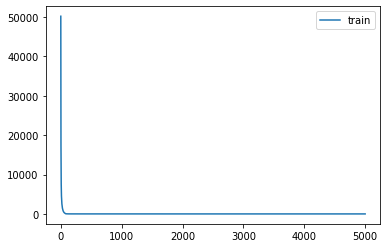

In [79]:
history=model1.fit(X_train,y_train_scaled, epochs=5000, shuffle=False, batch_size=64, verbose=1)
model1.save('./models/attempt12.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

In [56]:
'''coeffs= pywt.wavedec2(price_test, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
exp_X_test[:,0] = d[:-1,0]
exp_X_test[:,1] = d[:-1,1]
exp_X_test[:,2] = d[:1,2]
exp_X_test[:,3] = d[:-1,3]'''

"coeffs= pywt.wavedec2(price_test, 'haar',  mode='symmetric',level=2)\ncoeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])\nc=pywt.waverec2(coeffs,'haar')\ncoeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)\ncoeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])\nd=pywt.waverec2(coeffs1, 'haar')\nexp_X_test[:,0] = d[:-1,0]\nexp_X_test[:,1] = d[:-1,1]\nexp_X_test[:,2] = d[:1,2]\nexp_X_test[:,3] = d[:-1,3]"

In [57]:
#expXtest = exp_X_test[:,1:]

In [58]:
pd.DataFrame(autoencoded_X_train).head()

,0,1,2,3,4,5,6,7
0,0.0,0.088919,0.0,0.0,0.492633,0.0,0.0,0.383337
1,0.0,0.087473,0.0,0.0,0.478772,0.0,0.0,0.372860
2,0.0,0.088172,0.0,0.0,0.477818,0.0,0.0,0.373193
3,0.0,0.088276,0.0,0.0,0.478200,0.0,0.0,0.373522
4,0.0,0.081879,0.0,0.0,0.439776,0.0,0.0,0.344007


In [59]:
#exp_X_test=encoder.predict(scaler.transform(exp_X_test))
#exp_X_test=scaler.fit_transform(exp_X_test)
#scaled_df1=pd.DataFrame(exp_X_test)
#scaled_df1.head()

In [60]:
#y_test = exp_X_test[:,1]
#exp_X_test = np.delete(exp_X_test, 1, axis=1)
X_test=autoencoded_X_test.reshape((autoencoded_X_test.shape[0],1,autoencoded_X_test.shape[1]))

In [61]:
y_test = price_test.iloc[:,1]

In [62]:
pred=model1.predict(X_test)
actual= np.array(y_test)

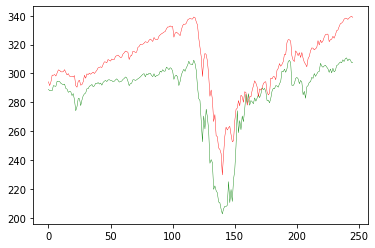

In [63]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./sae_prediction.png')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(552.1015273861241, 23.496840795862838, 20.49495566314152)


In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [67]:
print(mean_absolute_percentage_error(actual, pred))

9.191474290695165


In [83]:
actual2 = scaler.fit_transform(np.array(actual).reshape(-1,1))
pred2 = scaler.fit_transform(np.array(pred).reshape(-1,1))

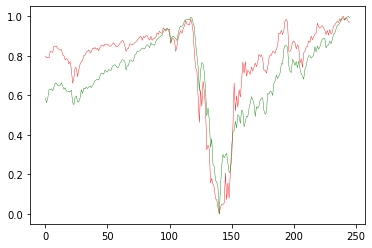

In [84]:
plt.plot(pred2, color='red',linewidth=0.4)
plt.plot(actual2, color='green', linewidth=0.4)

In [85]:
mse1 = mean_squared_error(actual2, pred2)
rmse1 = math.sqrt(mse1)
mae1 = mean_absolute_error(actual2, pred2)
mape1 = mean_absolute_percentage_error(actual2, pred2)
print("mse, rmse, mae, mape:" + str((mse1,rmse1,mae1,mape1)))

mse, rmse, mae, mape:(0.016788089267441613, 0.12956885917318872, 0.10969700903854745, nan)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [70]:
pd.DataFrame(X_test[:,0,:])

,0,1,2,3,4,5,6,7
0,0.0,0.192970,0.0,0.0,1.353970,0.0,0.0,1.052119
1,0.0,0.190001,0.0,0.0,1.339174,0.0,0.0,1.039965
2,0.0,0.192825,0.0,0.0,1.343929,0.0,0.0,1.044881
3,0.0,0.193019,0.0,0.0,1.339343,0.0,0.0,1.041609
4,0.0,0.199352,0.0,0.0,1.392306,0.0,0.0,1.082782
5,0.0,0.198192,0.0,0.0,1.387912,0.0,0.0,1.079043
6,0.0,0.197462,0.0,0.0,1.384845,0.0,0.0,1.076474
7,0.0,0.205195,0.0,0.0,1.436330,0.0,0.0,1.117012
8,0.0,0.204349,0.0,0.0,1.432044,0.0,0.0,1.113591
9,0.0,0.204589,0.0,0.0,1.433464,0.0,0.0,1.114704
